<a href="https://colab.research.google.com/github/KevinW824/CSE-144-Applied-Machine-Learning/blob/main/Summer_21_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
%matplotlib inline

# Assignment 1

**DUE: Sunday June 27 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [127]:
NAME = "Kevin Wang"
STUDENT_ID = "1769263"

## Problem 1 - Discrete Probability


When playing football, Sammy the Slug ALWAYS scores between 0 to 4 goals. The discrete probability distribution for the number of goals scored in a match is given in the table below where **x** is the number of goals scored in a game and **P(x)** is the probability of scoring **x** points.

| x      | P(x) |
| ----------- | ----------- |
| 0     | 0.01   |
| 1     | 0.03   |
| 2     | 0.21   |
| 3     | 0.46   |
| 4     | 0.26   |

### a) (1 point)

What is the probability that Sammy Scores 1 point in a match? 

$P(x=1) = 0.03$

What is the probability that Sammy scores 4 points in a match?

$P(x) = 0.26$

### b) (1 point)


What is $P(1<x<4)$?

$P(1 < x < 4) = P(x = 2) + P(x = 3)\\
= 0.21 + 0.46\\
= 0.67$

### c) (3 points)

What is $P(1\leq x \leq 4)$?

$P(1 < x < 4) = P(x = 1) + P(x = 2) + P(x = 3) + P(x = 4)\\
= 0.03 + 0.21 + 0.46 + 0.26\\
= 0.96$

### d) (3 points)

What is the Expectation of this distribution?

$E(X) = P(x = 0)\cdot 0 + P(x = 1)\cdot 1 + P(x = 2)\cdot 2 + P(x = 3)\cdot 3 + P(x = 4)\cdot 4\\
= 0.01\cdot 0 + 0.03\cdot 1 + 0.21\cdot 2 + 0.46\cdot 3 + 0.26\cdot 4\\
= 0 + 0.03 + 0.42 + 1.38 + 1.04\\
= 2.87$

### e) (3 points)

What is the variance of this distribution?

$\mu = E(x) = 2.87\\
\mu^2 = 8.23\\
E(X^2) = P(x = 0)\cdot 0^2 + P(x = 1)\cdot 1^2 + P(x = 2)\cdot 2^2 + P(x = 3)\cdot 3^2 + P(x = 4)\cdot 4^2\\
= 0 + 0.03 + 0.84 + 4.14 + 4.16\\
= 9.17\\
Var(X) = E(X^2) - \mu^2 = 9.17 - 8.23 = 0.94$

## Problem 2 - Continuous Probability

Sammy the slug also participates on the UCSC swim team. The probability that Sammy the Slug completes the 400m swim in $x$ seconds is modeled by the probability density function:
$$f(x)=0.019e^{-0.019x}$$
for $0\leq x\leq \infty$.

### a.) (4 points)

what is the probability that Sammy the Slug finishes the 400m swim in 200 seconds or less (hint: what is $F(200)$)? 


$P(t \leq 200s) = \int_0^{200} 0.019e^{-0.019x} \,dx\\
= 0.9776$

## Problem 3 -  Monte Carlo Simulation

Monte Carlo simulations can yield numeric solutions to probability problems that aren't possible to solve analytically. These simulations are also often easy to code up, and so also provide a way to check one's calculations for problems that amenable to analysis. So this is an important technique to become familiar with.

Basically, one creates a simulation of the situation, and runs many trials that allow one to estimate the probabilities by computing proportions. 

First we give you an example of a Monte Carlo simulation, and then you'll solve such a problem yourself.

### Example

If you toss a coin 10 times, with what probability are you likely to see the subsequence {H, H, T, T} appear?

Be patient, this may take a bit to run, but notice how straightforward the coding is. The simplicity of the Monte Carlo method makes it very powerful.

In [128]:
from numpy.random import randint
import numpy as np

num_tosses = 10    # tosses per trial
num_trials = 100000

# This sets the feedback interval so we know the program hasn't crashed.
feedback = int(np.round(num_trials / 10))

num_seq_found = 0   # to count the number of target subsequences detected
for t in range(1, num_trials + 1):
    
    # To see the progress.
    if t % feedback == 0:  
        print(np.round(100 * t / num_trials, 1), '%  complete:   prob =', num_seq_found / t)
        
    # Roll the die num_tosses times.
    trial = [randint(1, 3) for _ in range(num_tosses)]
    # Find the indices of all the 1s.
    heads = [i for i in range(num_tosses) if trial[i] == 1]
    
    # Search for the correct pattern.
    for j in heads:
        if j < num_tosses - 3 and trial[j] == 1 and trial[j + 1] == 1 and trial[j + 2] == 2 and trial[j + 3] == 2:
            # We've found the target subsequence.
            num_seq_found += 1
    
print('Probability of this subsequence =', num_seq_found / num_trials)

10.0 %  complete:   prob = 0.4424
20.0 %  complete:   prob = 0.4357
30.0 %  complete:   prob = 0.43566666666666665
40.0 %  complete:   prob = 0.4362
50.0 %  complete:   prob = 0.43746
60.0 %  complete:   prob = 0.43798333333333334
70.0 %  complete:   prob = 0.4377142857142857
80.0 %  complete:   prob = 0.4373875
90.0 %  complete:   prob = 0.4377
100.0 %  complete:   prob = 0.43785
Probability of this subsequence = 0.43785


### a) (6 points)

Consider two dice: One fair and one unfair. The unfair die has a 50% chance to land on the 3 face, and even chance for the rest of the faces.

Write code that rolls both dice and computes the sum.

Do this many times, and give the mean of all the sums.  This will converge to the expected average sum of both randomly rolled dice. You may need to run this several times to be sure of your accuracy. You can check the correctness of your Monte Carlo Simulation by solving this problem analytically.

Hint:

https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html

In [129]:
import numpy as np
from numpy.random import choice

num_trials = 100000

# YOUR CODE HERE

mean_sum = None
print('mean sum =', mean_sum)

mean sum = None


## Problem 4 - Heart Disease Dataset

When a data scientist first encounters a new dataset, the first step is data exploration. The dataset we'll be using is derived from the Heart database from the UCI Machine Learning Repository.

In [130]:
# Useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Read in the Data (4 points)
This is much easier when you have the data on your own hard drive! Just run the next couple of code blocks. You'll have to paste your authorization code at one point...


In [131]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [132]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [133]:
downloaded = drive.CreateFile({'id':"1qF_Ees7ETr5BiPnHTabyeIH1KQVkViUK"})   # Replace the id with id of file you want to access
downloaded.GetContentFile('Heart.csv')        # Replace the file name with your file

# Finally we can actually read in the data.
data = pd.read_csv('Heart.csv')

# How many rows and columns are in this dataset?
### YOUR CODE HERE ###
print(len(data))
print(len(data.columns))

306
15


Number of rows: 306

Number of columns: 15

### b) Understanding the Data (15 points)

Look for a data description file whenever you explore a new dataset. This is a codebook (or text file) that tells you what each data item represents. The following is a data dictionary for this dataset, which is derived from one in the UCI Machine Learning Dataset Repository.

Age: The person's age in years

Sex: The person's sex (1 = male, 0 = female)

ChestPain: The chest pain experienced <br>
.............typical angina  <br>
.............atypical angina <br>
.............non-anginal pain  <br>
.............asymptomatic

RestBP: The person's resting blood pressure (mm Hg on admission to the hospital)

Chol: The person's cholesterol measurement in mg/dl

Fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

RestECG: Resting electrocardiographic measurement <br>
.............0: normal <br>
.............1: having ST-T wave abnormality <br>
.............2: showing probable left ventricular hypertrophy by Estes' criteria

MaxHR: The person's maximum heart rate achieved

ExAng: Exercise induced angina (1 = yes; 0 = no)

Oldpeak: ST depression induced by exercise relative to rest <br>
..............('ST' relates to positions on the ECG plot.)

Slope: the slope of the peak exercise ST segment <br>
...........1: upsloping <br>
...........2: flat <br>
...........3: downsloping

Ca: The number of major vessels (0-3)

Thal: A blood disorder called thalassemia <br>
...........normal <br>
...........fixed <br>
...........reversable

AHD: Heart disease ('No', 'Yes') -  The target we would like to predict.

In [134]:
# Show the first few rows of the data.
### YOUR CODE HERE ###
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [135]:
# Print out the "info" of the dataset.
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  306 non-null    int64  
 1   Age         306 non-null    int64  
 2   Sex         306 non-null    int64  
 3   ChestPain   306 non-null    object 
 4   RestBP      306 non-null    int64  
 5   Chol        306 non-null    int64  
 6   Fbs         306 non-null    int64  
 7   RestECG     306 non-null    int64  
 8   MaxHR       306 non-null    int64  
 9   ExAng       306 non-null    int64  
 10  Oldpeak     306 non-null    float64
 11  Slope       306 non-null    int64  
 12  Ca          302 non-null    float64
 13  Thal        304 non-null    object 
 14  AHD         306 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 36.0+ KB


The above output can help you to see how much missing data is in the dataset. How many null values (missing values) exists in the data?

4 from Ca and 2 from Thal, 6 in total

What to do about missing values is very good question. Sometimes one replaces such missing values with the mean of all the values that are present for this variable. But to keep things simple here we will simply delete any rows with missing data.

Use the code cell below to drop null values from the data. [hint: you can use dropna() function]

In [136]:
# Drop any rows with missing data
### YOUR CODE HERE ###
data = data.dropna()

Another useful Pandas dataframe method is describe(). The describe method gives summary statistics for each column, which can help you to identify outliers.

In [137]:
# The describe method of a Pandas dataframe yields much useful information.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,152.216667,55.036667,0.676667,139.423333,247.073333,0.143333,0.993333,150.076667,0.326667,1.130333,1.610000,0.670000
std,88.235071,13.237299,0.468530,134.670429,52.367188,0.350998,0.994948,27.094362,0.469778,1.645887,0.621171,0.936674
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,75.750000,47.750000,0.000000,120.000000,211.000000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000
50%,151.500000,56.000000,1.000000,130.000000,242.500000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,228.250000,61.000000,1.000000,140.000000,276.250000,0.000000,2.000000,166.250000,1.000000,1.800000,2.000000,1.000000
max,306.000000,222.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Outliers are values far removed from the other data values, and are usually typos or other errors. Looking at the data description above, do you spot any possible outliers in the data?

Age, RestBP, Chol, MaxHR, Oldpeak

### c) Outlier Detection \& Elimination (8 points)
In this section, We'll remove any ages that are more than 4 standard deviations from the mean.

To accomplish this: 

1) You'll make a new column called AgeZ to hold the z-transformed values of the Age column. 


2) Then, any AgeZ value that's less than -4 or more than 4 should be flagged as an outlier. 


3) Remove those entries from the dataset.

Remember that standardizing the data (or z-transform) is making your data have a zero mean and unit variance. This can be done with:

$$x \to_{stdize}  \frac{x - \mu}{\sigma}$$
Where $\mu$ is your mean and $\sigma$ is your standard deviation.


In [138]:
data['AgeZ'] = (data['Age'] - data['Age'].mean()) / data['Age'].std(ddof=0)

# Delete any rows for which AgeZ is greater than 4 or less than -4.
data = data.drop(data[(data['AgeZ'] > 4)].index)
data = data.drop(data[(data['AgeZ'] < -4)].index)

# Cleanup - delete the z-tranform column since we don't need it any more.
data = data.drop(columns=['AgeZ'])

# Let's take another look.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,151.705686,54.478261,0.675585,139.387960,247.424749,0.143813,0.996656,150.571906,0.324415,1.124749,1.605351,0.672241
std,87.937251,9.052904,0.468941,134.894801,52.099449,0.351488,0.994948,25.743782,0.468941,1.645797,0.616962,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,151.000000,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,276.500000,0.000000,2.000000,166.500000,1.000000,1.700000,2.000000,1.000000
max,306.000000,77.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Notice that now the Age column is much more reasonable.  

Perform the same process to eliminate any extreme outliers (more than 4 standard deviations away from the mean) for RestBP, MaxHR, and the Oldpeak variables. Delete those exta columns after you have removed the outliers.

In [139]:
### YOUR CODE HERE ###
for col in data:
    if data[col].dtype != object:
        data['Z-tran'] = (data[col] - data[col].mean()) / data[col].std(ddof=0)
        data = data.drop(data[(data['Z-tran'] > 4)].index)
        data = data.drop(data[(data['Z-tran'] < -4)].index)
        data = data.drop(columns=['Z-tran'])

# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,151.289116,54.489796,0.683673,131.693878,246.653061,0.146259,0.993197,149.551020,0.329932,1.034354,1.595238,0.673469
std,87.396988,9.052269,0.465835,17.736837,48.603312,0.353968,0.994844,23.043862,0.470990,1.131798,0.615037,0.932268
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,75.250000,48.000000,0.000000,120.000000,211.250000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,150.500000,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,152.500000,0.000000,0.800000,2.000000,0.000000
75%,226.750000,61.000000,1.000000,140.000000,275.750000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,302.000000,77.000000,1.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000


### d) Data Visualization (8 points)

Sometimes it's useful to look at a pairwise plot of all the variables. Below we do this for all but the first column. Be patient, this takes a minute to complete. Notice that the main diagonal has histogram plots for each variable, which gives you a sense of the distribution of values of each variable.

In [140]:
# Make a pairplot of all the variables (columns), excepting the first column.
# plt.rcParams['figure.figsize'] = (15, 15)
# sns.pairplot(data.drop(columns='Unnamed: 0'))

Let's look at a larger plot of the patient age distribution for the patients in this dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

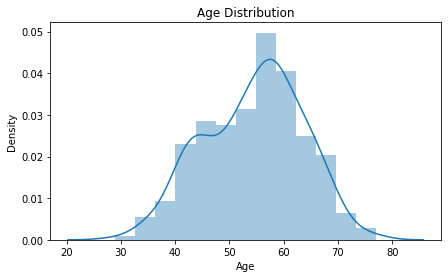

In [141]:
# Plot the patient age distribution.
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Age'])
plt.title('Age Distribution')

Plot the distribution of patient cholesterol levels.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol Level Distribution')

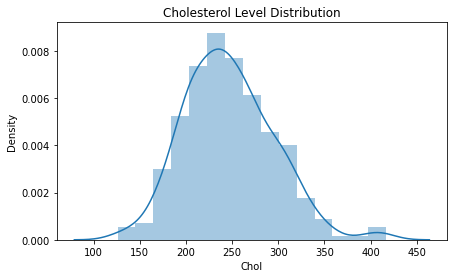

In [142]:
### YOUR CODE HERE ###
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Chol'])
plt.title('Cholesterol Level Distribution')

### e) Data Normalization (8 points)

We've already seen how the z-transform can be used to rescale values. We used this to help eliminate outliers, but such transforms can also be useful prior to applying machine learning algorithms, and often improves the algorithms performance. 

Another common transform is to map all the variable values into the interval $[0,1]$, via the transform:

$$x \to  \frac{x - \min}{\max - \min}$$

Let's create a new column ('NewAge') mapping all ages into the interval $[0,1]$.

In [143]:
# Create a new column, NewAge, to hold the normalized Age variable.
data['NewAge'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min()) ### YOUR CODE HERE ###

# Take a look at the new age column.
data['NewAge']

0      0.708333
1      0.791667
2      0.791667
3      0.166667
4      0.250000
         ...   
297    0.583333
298    0.333333
299    0.812500
300    0.583333
301    0.583333
Name: NewAge, Length: 294, dtype: float64

In [144]:
# We don't need this column, so we delete it. (It was just to show you how to do this.)
data = data.drop(columns=['NewAge'])

Map the minimum to 0 and maximum to 1 (in other words, normalize the column) for the RestBP, Chol, and MaxHR columns. Don't create new columns, just replace the existing ones with the transformed data.

In [145]:
### YOUR CODE HERE ###
for col in data:
    if data[col].dtype != object:
        data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,0.499299,0.531037,0.683673,0.355603,0.414615,0.146259,0.496599,0.599626,0.329932,0.184706,0.297619,0.224490
std,0.290355,0.188589,0.465835,0.167329,0.167022,0.353968,0.497422,0.175907,0.470990,0.202107,0.307519,0.310756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246678,0.395833,0.000000,0.245283,0.292955,0.000000,0.000000,0.473282,0.000000,0.000000,0.000000,0.000000
50%,0.496678,0.562500,1.000000,0.339623,0.402062,0.000000,0.500000,0.622137,0.000000,0.142857,0.500000,0.000000
75%,0.750000,0.666667,1.000000,0.433962,0.514605,0.000000,1.000000,0.725191,1.000000,0.285714,0.500000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### f) Converting Categorical Data to Numeric Values (6 points)

It's frequently useful to convert categorical (non-numeric) values to numeric ones. The last variable in the data frame, AHD, has categorical values 'No' if the patient has no heart disease, and 'Yes' if they do. Convert these values to 0 for 'No' and 1 for 'Yes'.

In [146]:
### YOUR CODE HERE ###
data['AHD'] = data['AHD'].map({'Yes': 1, 'No': 0})
print(data['AHD'])

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 294, dtype: int64


### g) One-Hot-Encoding (10 points)

One-hot-encoding is another often used way of converting categorical data to numeric. For example, instead of the categories 'cold', 'warm', 'hot', we form a seperate column for each of these attributes, so that what was represented as 'cold' is now $[1,0,0]$ and what was 'hot' is now $[0,0,1]$.  There is a built in command for doing this in the sklearn package.

Similar to what you've learned from the class exercise of lecture 2, add new columns for one-hot-encoding of 'Thal' column. Use 'Thal' as the prefix. Then drop the original column.

In [168]:
# Concatentate new one-hot encodings with the original dataframe.
from sklearn.preprocessing import OneHotEncoder
encode = []
data = pd.concat([data, OneHotEncoder().fit_transform().toarray()])### YOUR CODE HERE ###

# now drop the original 'Thal' column (you don't need it anymore)
data = data.drop(columns=['Thal'])
### YOUR CODE HERE ###

data.head()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: ignored

Create a one-hot-encoding for the ChestPain column, just as we did above for the Thal column, deleting the original column as before.

In [ ]:
### YOUR CODE HERE ###


# Leave this for your last line.
data.head()

### h) Feature Engineering (10 points)

Feature engineering is central to much of machine learning. Traditionally such features needed to be hand crafted, which is as much an art as it is engineering. One of the huge advantages of neural networks over traditional machine learning techniques is that neural networks can learn optimal features.

Create a new column (feature) called AgeC, which will be the product of the patient's age and the patient's cholesterol level. 

In [147]:
### YOUR CODE HERE ###
data['AgeC'] = data['Age'] * data['Chol']

# Leave this for your last line.
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AgeC
0,0.000000,0.708333,1.0,typical,0.481132,0.367698,1.0,1.0,0.603053,0.0,0.410714,1.0,0.000000,fixed,0,0.260452
1,0.003322,0.791667,1.0,asymptomatic,0.622642,0.549828,0.0,1.0,0.282443,1.0,0.267857,0.5,1.000000,normal,1,0.435281
2,0.006645,0.791667,1.0,asymptomatic,0.245283,0.353952,0.0,1.0,0.442748,1.0,0.464286,0.5,0.666667,reversable,1,0.280212
3,0.009967,0.166667,1.0,nonanginal,0.339623,0.426117,0.0,0.0,0.885496,0.0,0.625000,1.0,0.000000,normal,0,0.071019
4,0.013289,0.250000,0.0,nontypical,0.339623,0.268041,0.0,1.0,0.770992,0.0,0.250000,0.0,0.000000,normal,0,0.067010


###  i) Balanced or Unbalanced Classes (10 points)

For this dataset, one variable that we might like to predict is the presence of heart disease, the AHD column, using all the other columns. Some datasets are highly imbalanced.  Suppose that 95% of a set of subjects were healthy, with only 5% having heart disease. A machine learning model can attain 95% accuracy by simply ALWAYS predicting no heart disease. It sounds like a fairly accurate model, but it would miss predicting any heart disease! 

There are techniques for dealing with this, but first we have to ascertain if our data is unbalanced. Use the code cell below to see if the data is imbalanced or not and describe your observations in the next text cell

num of 0s:  158
53.74149659863946 % are No
num of 1s:  136
46.25850340136054 % are Yes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AHD Distribution')

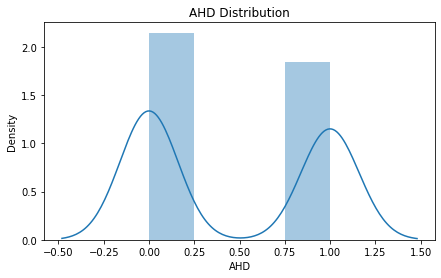

In [161]:
### YOUR CODE HERE ###
zeros = (data['AHD'] == 0).astype(int).sum()
print('num of 0s: ', zeros)
print((zeros / 294 * 100), '% are No')
ones = (data['AHD'] == 1).astype(int).sum()
print('num of 1s: ', ones)
print((ones / 294 * 100), '% are Yes')
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['AHD'])
plt.title('AHD Distribution')

This data is balanced because the percentage of Yes and No are relatively close.